### Lecture 18: Dropping Missing Values in Pandas (Complete Case Analysis)

Steps
1. Checking which columns have MCAR < 5% (Missing completely at random)
2. Seperating columns which have less than 5% missing values
  <br> a. Making sure Nan Values are MCAR
3. How much rows will be left after dropping NaN values
4. Dropping Rows with NaN Values
5. Visualizing Changes

Importing Useful Libraries

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

Importing Data

In [33]:
df=pd.read_csv('Automobile.csv')
df.head()

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,usa
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,usa
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,usa
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,usa
4,ford torino,NaN,8,NaN,140.0,3449,NaN,70,usa


Step 1

In [34]:
df.isnull().mean()*100

name            0.000000
mpg             4.271357
cylinders       0.000000
displacement    3.015075
horsepower      3.517588
weight          0.000000
acceleration    8.542714
model_year      0.000000
origin          4.773869
dtype: float64

Step 2

In [35]:
cols=[var for var in df.columns if df[var].isnull().mean()<0.05 and df[var].isnull().mean()>0]
print(cols)

['mpg', 'displacement', 'horsepower', 'origin']


In [36]:
df[cols].sample(10)

,mpg,displacement,horsepower,origin
157,15.0,350.0,145.0,usa
126,21.0,200.0,21.0,usa
385,38.0,91.0,67.0,japan
326,43.4,90.0,48.0,europe
55,27.0,97.0,60.0,europe
352,29.9,98.0,65.0,usa
74,13.0,302.0,140.0,usa
84,27.0,NaN,88.0,japan
383,38.0,91.0,67.0,japan
247,39.4,85.0,70.0,japan


Step 3

In [37]:
len(df[cols].dropna())/len(df)

0.8592964824120602

In [38]:
df.shape
#checking how many rows were there

(398, 9)

Step 4

Real world case

In [39]:
# df.dropna(subset=cols)

In [40]:
cleanedDf=df[cols].dropna()

In [41]:
cleanedDf.isnull().mean()

mpg             0.0
displacement    0.0
horsepower      0.0
origin          0.0
dtype: float64

Step 5

Numerical Columns: mpg	displacement	horsepower

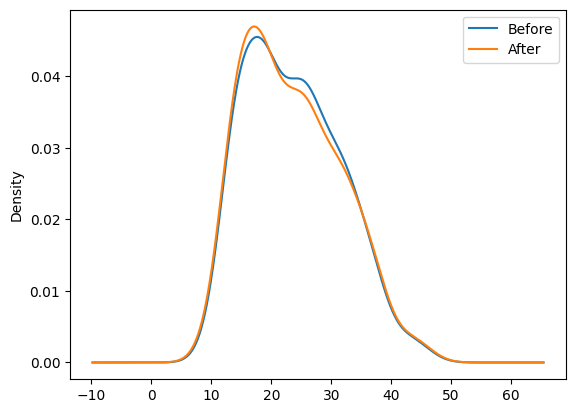

In [42]:
# mpg
fig=plt.figure()
axis=fig.add_subplot(111)

df['mpg'].plot(kind='kde',ax=axis,label='Before')
cleanedDf['mpg'].plot(kind='kde',ax=axis,label='After')
plt.legend()

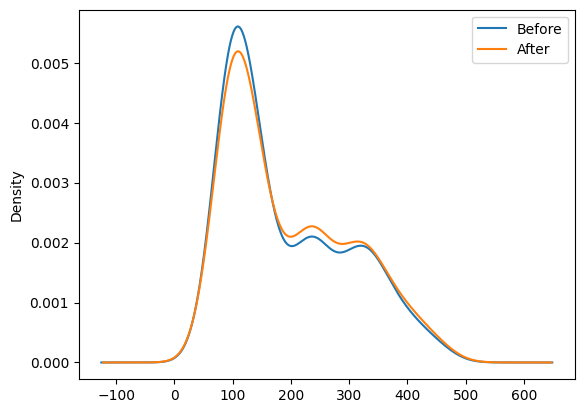

In [43]:
# displacement
fig=plt.figure()
axis=fig.add_subplot(111)

df['displacement'].plot(kind='kde',ax=axis,label='Before')
cleanedDf['displacement'].plot(kind='kde',ax=axis,label='After')
plt.legend()

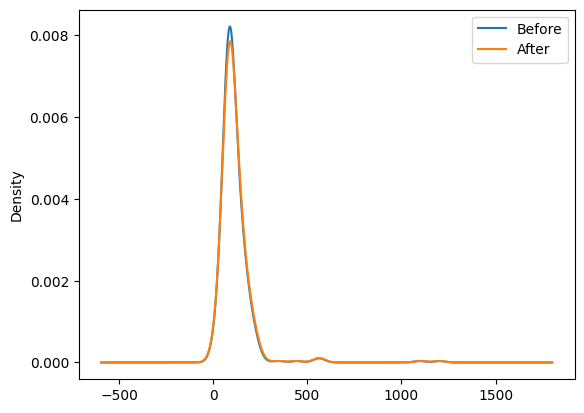

In [44]:
# horsepower
fig=plt.figure()
axis=fig.add_subplot(111)

df['horsepower'].plot(kind='kde',ax=axis,label='Before')
cleanedDf['horsepower'].plot(kind='kde',ax=axis,label='After')
plt.legend()

Categorical

In [45]:
newDf=pd.concat(
    
    [
        
        df['origin'].value_counts()/len(df),

       
        
        cleanedDf['origin'].value_counts()/len(cleanedDf)
    ],axis=1
)

newDf.columns=['Original','CCA']

newDf

,Original,CCA
origin,,
usa,0.608040,0.646199
japan,0.183417,0.195906
europe,0.160804,0.157895
